# Effect of Rest-Activity Rhythm Amplitude

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
data_dir = '/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/'

In [24]:
d = []
#d = pd.read_csv(data_dir + 'dataset_2020-04-09.csv')
d = pd.read_csv(data_dir + 'dataset_2020-06-17.csv')
d = d.sort_values('record_id', ascending = True)
d['sex'] = np.where(d['sex'] == 'Female', 0, 1)
d[0:5]

,Unnamed: 0,record_id,X1,X1_1,files,cc_fa,ccbody_fa,splenium_fa,genu_fa,coronaradiata_fa,...,Cluster R,Genu,Splenium,rt_mean,rt_sd,fs,rl,cc_md,corona_radiata_md,superior_long_fasciculus_md
0,1,30004,1,2,sub-30004_dti_FA.nii.gz,0.582804,0.611310,0.566238,0.562470,0.428863,...,0.502490,0.744421,0.652468,315.387755,166.379062,2.0,0.0,0.000084,0.000106,0.000113
1,2,30008,2,3,sub-30008_dti_FA.nii.gz,0.559800,0.576979,0.558679,0.534799,0.447307,...,0.530835,0.762561,0.639268,295.263736,85.301275,1.0,0.0,0.000088,0.000106,0.000115
2,3,30008,2,3,sub-30008_dti_FA.nii.gz,0.559800,0.576979,0.558679,0.534799,0.447307,...,0.530835,0.762561,0.639268,327.378947,76.828931,0.0,0.0,0.000088,0.000106,0.000115
3,4,30009,3,4,sub-30009_dti_FA.nii.gz,0.601367,0.623060,0.591248,0.582314,0.495590,...,0.517945,0.754535,0.647044,321.202020,208.541337,0.0,0.0,0.000085,0.000105,0.000113
4,5,30012,4,5,sub-30012_dti_FA.nii.gz,0.587033,0.610001,0.575670,0.567798,0.460135,...,0.565553,0.738804,0.647255,290.311111,61.526580,1.0,0.0,0.000083,0.000100,0.000110


In [25]:
oa_files = []
oa_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_oa/origdata'), columns = ['files'])
oa_files['record_id'] = oa_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
oa_files = oa_files.drop('files', axis=1)
oa_files = oa_files.set_index('record_id')

oa_df = []
oa_df = d[d['Group'] == 'Older Adults']
oa_df = oa_df.set_index('record_id')

oa_dsn = []
oa_dsn = oa_files.join(oa_df, sort=True).dropna(subset = ['files'])

In [26]:
oa_dsn.shape

(57, 763)

In [27]:
oa_dsn['actamp'].isnull().sum()

2

In [28]:
ya_files = []
ya_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_ya/origdata'), columns = ['files'])
ya_files['record_id'] = ya_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
ya_files = ya_files.drop('files', axis=1)
ya_files = ya_files.set_index('record_id')

ya_df = []
ya_df = d[d['Group'] == 'Young Adults']
ya_df = ya_df.set_index('record_id')

ya_dsn = []
ya_dsn = ya_files.join(ya_df, sort=True).dropna(subset = ['files'])

In [45]:
ya_dsn = ya_dsn.drop_duplicates(subset = 'files')

In [46]:
ya_dsn

,Unnamed: 0,X1,X1_1,files,cc_fa,ccbody_fa,splenium_fa,genu_fa,coronaradiata_fa,postthalamicradiation_fa,...,Cluster R,Genu,Splenium,rt_mean,rt_sd,fs,rl,cc_md,corona_radiata_md,superior_long_fasciculus_md
record_id,,,,,,,,,,,,,,,,,,,,,
30004,1,1,2,sub-30004_dti_FA.nii.gz,0.582804,0.611310,0.566238,0.562470,0.428863,0.576000,...,0.502490,0.744421,0.652468,315.387755,166.379062,2.0,0.0,0.000084,0.000106,0.000113
30008,2,2,3,sub-30008_dti_FA.nii.gz,0.559800,0.576979,0.558679,0.534799,0.447307,0.550600,...,0.530835,0.762561,0.639268,295.263736,85.301275,1.0,0.0,0.000088,0.000106,0.000115
30009,4,3,4,sub-30009_dti_FA.nii.gz,0.601367,0.623060,0.591248,0.582314,0.495590,0.572924,...,0.517945,0.754535,0.647044,321.202020,208.541337,0.0,0.0,0.000085,0.000105,0.000113
30012,5,4,5,sub-30012_dti_FA.nii.gz,0.587033,0.610001,0.575670,0.567798,0.460135,0.568308,...,0.565553,0.738804,0.647255,290.311111,61.526580,1.0,0.0,0.000083,0.000100,0.000110
30015,6,5,6,sub-30015_dti_FA.nii.gz,0.586247,0.612781,0.574272,0.562366,0.440007,0.578826,...,0.557501,0.751614,0.637008,265.574468,56.882541,1.0,0.0,0.000083,0.000103,0.000113
30019,7,6,7,sub-30019_dti_FA.nii.gz,0.569355,0.589439,0.574998,0.530129,0.449558,0.563344,...,0.567357,0.746058,0.590233,302.010989,84.349207,1.0,0.0,0.000083,0.000102,0.000111
30020,8,7,8,sub-30020_dti_FA.nii.gz,0.568377,0.592735,0.567359,0.532109,0.449781,0.587501,...,0.524187,0.735830,0.615053,275.454545,232.539673,2.0,0.0,0.000089,0.000108,0.000115
30023,9,8,9,sub-30023_dti_FA.nii.gz,0.543015,0.552323,0.537372,0.536714,0.398651,0.519216,...,0.481800,0.716998,0.647094,271.223404,46.893876,0.0,0.0,0.000084,0.000108,0.000114
30040,10,9,11,sub-30040_dti_FA.nii.gz,0.583833,0.606491,0.575018,0.561411,0.449930,0.572092,...,0.549373,0.737955,0.650061,264.826531,264.165600,2.0,0.0,0.000083,0.000105,0.000112


In [47]:
ya_dsn['actamp'].isnull().sum()

2

## Interaction Age Group x Rhythm Amplitude and WM

1. Concatenate all_FA images
2. Run fsl randomise looking for interaction of age group x RAR amplitude

In [7]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmerge -h

printf "\nYoung Adults All FA\n"
fslinfo tbss_ya/stats/all_FA

printf "\nOlder Adults All FA\n"
fslinfo tbss_oa/stats/all_FA


Usage: fslmerge <-x/y/z/t/a/tr> <output> <file1 file2 .......> [tr value in seconds]
     -t : concatenate images in time
     -x : concatenate images in the x direction
     -y : concatenate images in the y direction
     -z : concatenate images in the z direction
     -a : auto-choose: single slices -> volume, volumes -> 4D (time series)
     -tr : concatenate images in time and set the output image tr to the final option value

Young Adults All FA
data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		46
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+

Older Adults All FA
data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		57
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+


In [48]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmerge -t tbss/stats/all_FA_YA-OA tbss_ya/stats/all_FA tbss_oa/stats/all_FA

In [11]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslinfo tbss/stats/all_FA_YA-OA

data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		103
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+


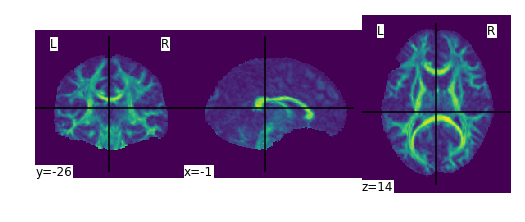

In [50]:
from nilearn import image
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
nii = scan_dir + 'tbss/stats/all_FA_YA-OA.nii.gz'
first_vol = image.index_img(nii, 0)
plotting.plot_img(first_vol)

In [42]:
%%bash

fslmaths -h


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any

In [52]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmaths tbss/stats/all_FA_YA-OA -Tmean -thr 0.25 -bin tbss/stats/all_FA_YA-OA_mask

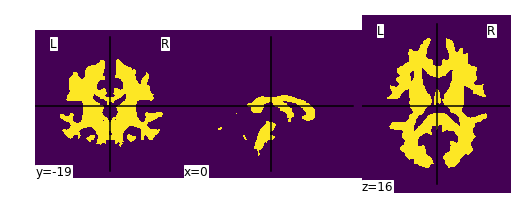

In [53]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'tbss/stats/all_FA_YA-OA_mask.nii.gz')

[FSL GLM 2 groups, continuous covariate interaction](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM#Two_Groups_with_continuous_covariate_interaction) <br>

[Mumford Brain Stats](http://mumford.fmripower.org/mean_centering/)

In [78]:
import numpy as np
import pandas as pd
import os

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
data_dir = '/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/'

x1 = np.concatenate((np.ones(46), np.zeros(57)))
x2 = np.concatenate((np.zeros(46), np.ones(57)))

d = pd.read_csv(data_dir + 'dataset_2020-06-17.csv', usecols = ['record_id', 'actamp', 'sex', 'age'])
d = d.sort_values('record_id', ascending = True)
d = d.set_index('record_id')

ya_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_ya/origdata'), columns = ['files'])
oa_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_oa/origdata'), columns = ['files'])
files = pd.DataFrame(np.concatenate([ya_files, oa_files]), columns = ['files'])
files['record_id'] = files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
files = files.set_index('record_id')

dsn = []
dsn = files.join(d, sort=True).dropna(subset = ['files']).drop_duplicates(subset = 'files')

print(dsn['actamp'].isnull().sum())
dsn['actamp'] = dsn['actamp'].fillna(dsn['actamp'].mean())
#NOT mean centering because testing the interaction
print(dsn['actamp'].isnull().sum())

x3 = x1 * dsn['actamp'].values
x4 = x2 * dsn['actamp'].values

dsnmat = []
dsnmat = np.column_stack((x1, x2, x3, x4))

#np.savetxt(scan_dir + 'tbss/new/ya_oa_amp-ya_amp-oa.txt', dsnmat, fmt = '%f')


4
0


In [39]:
dsnmat

array([[1.        , 0.        , 1.63089166, 0.        ],
       [1.        , 0.        , 1.61048398, 0.        ],
       [1.        , 0.        , 1.95124461, 0.        ],
       [1.        , 0.        , 1.63436476, 0.        ],
       [1.        , 0.        , 1.5959711 , 0.        ],
       [1.        , 0.        , 1.58045198, 0.        ],
       [1.        , 0.        , 1.86881877, 0.        ],
       [1.        , 0.        , 1.30709584, 0.        ],
       [1.        , 0.        , 1.62806941, 0.        ],
       [1.        , 0.        , 1.96734447, 0.        ],
       [1.        , 0.        , 1.59717069, 0.        ],
       [1.        , 0.        , 1.47897639, 0.        ],
       [1.        , 0.        , 1.54705614, 0.        ],
       [1.        , 0.        , 1.7856142 , 0.        ],
       [1.        , 0.        , 1.66089455, 0.        ],
       [1.        , 0.        , 1.68289809, 0.        ],
       [1.        , 0.        , 1.93609241, 0.        ],
       [1.        , 0.        ,

In [55]:
dsnmat_main = np.column_stack((x1, x2, dsn['actamp'].values))

np.savetxt(scan_dir + 'tbss/new/ya_oa_amp_main_effect.txt', dsnmat_main, fmt = '%f')

In [41]:
dsnmat_main

array([[1.        , 0.        , 1.63089166],
       [1.        , 0.        , 1.61048398],
       [1.        , 0.        , 1.95124461],
       [1.        , 0.        , 1.63436476],
       [1.        , 0.        , 1.5959711 ],
       [1.        , 0.        , 1.58045198],
       [1.        , 0.        , 1.86881877],
       [1.        , 0.        , 1.30709584],
       [1.        , 0.        , 1.62806941],
       [1.        , 0.        , 1.96734447],
       [1.        , 0.        , 1.59717069],
       [1.        , 0.        , 1.47897639],
       [1.        , 0.        , 1.54705614],
       [1.        , 0.        , 1.7856142 ],
       [1.        , 0.        , 1.66089455],
       [1.        , 0.        , 1.68289809],
       [1.        , 0.        , 1.93609241],
       [1.        , 0.        , 1.5959711 ],
       [1.        , 0.        , 1.57997722],
       [1.        , 0.        , 1.7865024 ],
       [1.        , 0.        , 1.94296678],
       [1.        , 0.        , 2.09722842],
       [1.

In [56]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

Text2Vest ya_oa_amp-ya_amp-oa.txt ya_oa_amp-ya_amp-oa.mat
Text2Vest ya_oa_amp_main_effect.txt ya_oa_amp_main_effect.mat

printf "0 0 -1 1\n0 0 1 -1" > int.txt
Text2Vest int.txt int.con

## Interaction using skeleton

In [62]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_FA_skeletonised -o tbss_int_skel -m mean_FA_skeleton_mask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D


randomise options: -i all_FA_skeletonised -o tbss_int_skel -m mean_FA_skeleton_mask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.0631e+162 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting p

In [13]:
%%bash

more /Volumes/G-DRIVE\ mobile/derivatives/tbss/new/int.con


/NumWaves 4
/NumPoints 2
/Matrix
0 0 -1 1
0 0 1 -1

/Users/megmcmahon/Library/Python/3.7/lib/python/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


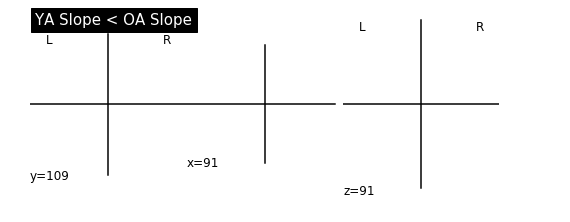

In [63]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_int_skel_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'YA Slope < OA Slope')


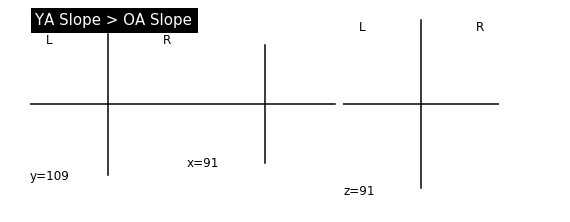

In [64]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_int_skel_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'YA Slope > OA Slope')


In [57]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_FA_skeletonised -o tbss_main_skel -m mean_FA_skeleton_mask -d ya_oa_amp_main_effect.mat -t main_effect.con -n 500 --T2 -D


randomise options: -i all_FA_skeletonised -o tbss_main_skel -m mean_FA_skeleton_mask -d ya_oa_amp_main_effect.mat -t main_effect.con -n 500 --T2 -D 
Loading Data: 
Data loaded
3.43851e+160 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 3

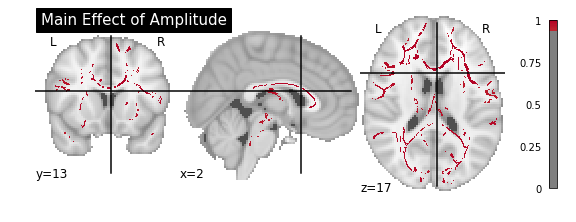

In [58]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_main_skel_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Main Effect of Amplitude')


In [47]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new
ls *mean_FA*

mean_FA.nii.gz
mean_FA_mask.nii.gz
mean_FA_skeleton.nii.gz
mean_FA_skeleton_mask.nii.gz
mean_FA_skeleton_mask_dst.nii.gz


In [48]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

tbss_fill tbss_main_skel_tfce_corrp_tstat1.nii.gz 0.95 mean_FA tbss_main_amp7_skel_fill

In [59]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

cluster -i tbss_main_skel_tfce_corrp_tstat1.nii.gz -t 0.95 --scalarname="1-p" --mm --oindex=tbss_all_skel_amp7_clusters > cluster_all_t1_95_skel.txt

more cluster_all_t1_95_skel.txt

Cluster Index	Voxels	1-p-MAX	1-p-MAX X (mm)	1-p-MAX Y (mm)	1-p-MAX Z (mm)	1-p-COG X (mm)	1-p-COG Y (mm)	1-p-COG Z (mm)
1	57839	0.998	13	43	-14	-0.459	-16.1	16.1


In [60]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

fslmaths tbss_all_skel_amp7_clusters -uthr 1 -thr 1 -bin tbss_all_skel_amp7_cluster1_mask

In [61]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_all_skel_amp7_cluster1_mask

Unclassified:71.0563
Middle cerebellar peduncle:0.1941
Pontine crossing tract (a part of MCP):0.0832
Genu of corpus callosum:2.8278
Body of corpus callosum:3.9368
Splenium of corpus callosum:2.4951
Fornix (column and body of fornix):0.3465
Corticospinal tract R:0.0416
Corticospinal tract L:0.0139
Medial lemniscus R:0.1109
Medial lemniscus L:0.1941
Inferior cerebellar peduncle R:0.1248
Inferior cerebellar peduncle L:0.1386
Superior cerebellar peduncle R:0.3188
Superior cerebellar peduncle L:0.1386
Cerebral peduncle R:0.3604
Cerebral peduncle L:0.3188
Anterior limb of internal capsule R:0.1248
Anterior limb of internal capsule L:0.3743
Posterior limb of internal capsule R:0.3881
Posterior limb of internal capsule L:0.4020
Retrolenticular part of internal capsule R:0.6931
Retrolenticular part of internal capsule L:0.6238
Anterior corona radiata R:1.9268
Anterior corona radiata L:2.0654
Superior corona radiata R:0.6376
Superior corona radiata L:0.7485
Posterior corona radiata R:0.6238
Post

## TBSS with non-parametric rest-activity measures

In [31]:
import numpy as np

imp = []
imp = oa_dsn[['actamp', 'RA', 'IS', 'IV','age', 'sex']]

imp['actamp'] = imp['actamp'].fillna(oa_dsn['actamp'].mean())
imp['actamp'] = imp['actamp'] - imp['actamp'].mean()

imp['RA'] = imp['RA'].fillna(oa_dsn['RA'].mean())
imp['RA'] = imp['RA'] - imp['RA'].mean()

imp['IS'] = imp['IS'].fillna(oa_dsn['IS'].mean())
imp['IS'] = imp['IS'] - imp['IS'].mean()

imp['IV'] = imp['IV'].fillna(oa_dsn['IV'].mean())
imp['IV'] = imp['IV'] - imp['IV'].mean()

imp

np.savetxt(scan_dir + 'tbss_oa/stats/dsn_RA.txt', imp[['RA']].values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_oa/stats/dsn_IS.txt', imp[['IS']].values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_oa/stats/dsn_IV.txt', imp[['IV']].values, fmt = '%f')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [14]:
import numpy as np

imp = []
imp = oa_dsn[['actamp', 'RA', 'IS', 'IV','age', 'sex']]

imp['actamp'] = imp['actamp'].fillna(oa_dsn['actamp'].mean())

imp[['actamp', 'age', 'sex']].values

np.savetxt(scan_dir + 'tbss_oa/stats/dsn_amp_age_sex_noD.txt', imp[['actamp', 'age', 'sex']].values, fmt = '%f')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
imp = []
imp = ya_dsn[['actamp', 'RA', 'IS', 'IV','age', 'sex']]

imp['actamp'] = imp['actamp'].fillna(ya_dsn['actamp'].mean())
imp['actamp'] = imp['actamp'] - imp['actamp'].mean()

imp['RA'] = imp['RA'].fillna(ya_dsn['RA'].mean())
imp['RA'] = imp['RA'] - imp['RA'].mean()

imp['IS'] = imp['IS'].fillna(ya_dsn['IS'].mean())
imp['IS'] = imp['IS'] - imp['IS'].mean()

imp['IV'] = imp['IV'].fillna(ya_dsn['IV'].mean())
imp['IV'] = imp['IV'] - imp['IV'].mean()

imp['ones'] = np.ones(len(imp))

imp

np.savetxt(scan_dir + 'tbss_ya/stats/dsn_RA.txt', imp[['RA']].values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_ya/stats/dsn_IS.txt', imp[['IS']].values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_ya/stats/dsn_IV.txt', imp[['IV']].values, fmt = '%f')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

## TBSS amplitude effect within age-groups

In [19]:
x1 = oa_dsn['actamp'].fillna(oa_dsn['actamp'].mean())
x1 = x1 - x1.mean()
x1

record_id
40160    0.428078
40170   -0.581044
40175    1.564585
40288    0.142030
40351    0.453859
40490   -0.086702
40496    0.275582
40512   -0.148541
40519   -0.096424
40520    0.187463
40522    0.375212
40524   -0.365661
40547   -0.060246
40550   -0.004402
40564    0.299639
40601   -0.010306
40608    0.054003
40615   -0.010279
40619    0.099806
40623    0.056523
40624    0.000000
40629   -0.581044
40638    0.040266
40649    0.048362
40650   -0.422988
40653    0.187391
40655    0.069528
40656   -0.427258
40658    0.242733
40664   -0.113161
40665    0.033422
40668   -0.041853
40672   -0.160607
40685    0.163263
40694   -0.427614
40720    0.097415
40728    0.357866
40738   -0.112816
40743    0.000000
40750   -0.128281
40758   -0.275928
40767   -0.045040
40768   -0.253135
40769   -0.452665
40773    0.120891
40775    0.174371
40777   -0.451099
40778    0.024303
40779    0.016761
40782    0.286178
40784    0.057440
40796   -0.163075
40803    0.020533
40811   -0.340523
40861   -0.460838


In [22]:
x2 = ya_dsn['actamp'].fillna(ya_dsn['actamp'].mean())
x2 = x2 - x2.mean()
x2

record_id
30004    1.626219e-02
30008   -4.145489e-03
30009    3.366151e-01
30012    1.973529e-02
30015    2.220446e-16
30019   -3.417749e-02
30020    2.541893e-01
30023   -3.075336e-01
30040    1.343994e-02
30057    3.527150e-01
30064   -1.745877e-02
30066   -1.356531e-01
30069   -6.757333e-02
30074    1.709847e-01
30085    4.626508e-02
30088    6.826862e-02
30090    3.214629e-01
30091    2.220446e-16
30095   -3.465225e-02
30096    1.718729e-01
30116    3.283373e-01
30118    4.825989e-01
30119   -1.321386e-02
30128   -6.950523e-02
30181    2.729783e-01
30217   -1.006152e-01
30236   -3.000786e-01
30242   -2.685480e-01
30255    9.034266e-03
30274   -6.146295e-01
30295    1.123572e-01
30346    1.388168e-01
30376   -3.524805e-01
30395   -1.516613e-01
30400   -2.609435e-01
30403    1.788491e-01
30412   -6.146295e-01
30426    6.976558e-01
30432   -3.357158e-01
30466   -3.042053e-01
30469    4.186877e-02
30478    1.462894e-01
30568    2.695141e-01
30581   -6.146295e-01
30584    3.057147e-01


In [23]:
np.savetxt(scan_dir + 'tbss_oa/stats/dsn_amp7.txt', x1.values, fmt = '%f')
np.savetxt(scan_dir + 'tbss_ya/stats/dsn_amp7.txt', x2.values, fmt = '%f')


In [24]:
%%bash

more /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats/dsn_amp7.txt

0.016262
-0.004145
0.336615
0.019735
0.000000
-0.034177
0.254189
-0.307534
0.013440
0.352715
-0.017459
-0.135653
-0.067573
0.170985
0.046265
0.068269
0.321463
0.000000
-0.034652
0.171873
0.328337
0.482599
-0.013214
-0.069505
0.272978
-0.100615
-0.300079
-0.268548
0.009034
-0.614629
0.112357
0.138817
-0.352480
-0.151661
-0.260944
0.178849
-0.614629
0.697656
-0.335716
-0.304205
0.041869
0.146289
0.269514
-0.614629
0.305715
-0.153776


In [25]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
Text2Vest dsn_amp7.txt dsn_amp7.mat

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
Text2Vest dsn_amp7.txt dsn_amp7.mat

In [26]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

randomise -i all_FA_skeletonised -m mean_FA_skeleton_mask -o tbss_ya_skel_amp7_mfa -d dsn_amp7.mat \
-t 1var.con -n 500 --T2 -D

randomise options: -i all_FA_skeletonised -m mean_FA_skeleton_mask -o tbss_ya_skel_amp7_mfa -d dsn_amp7.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
4.58552e+56 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting per

In [45]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

tbss_fill tbss_ya_skel_amp7_mfa_tfce_corrp_tstat1.nii.gz 0.95 mean_FA tbss_ya_skel_amp7_fill

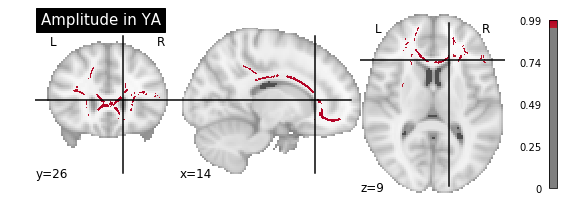

In [28]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_ya_skel_amp7_mfa_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Amplitude in YA')


In [27]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

randomise -i all_FA_skeletonised -m mean_FA_skeleton_mask -o tbss_oa_skel_amp7_mfa -d dsn_amp7.mat \
-t 1var.con -n 500 --T2 -D

randomise options: -i all_FA_skeletonised -m mean_FA_skeleton_mask -o tbss_oa_skel_amp7_mfa -d dsn_amp7.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.01317e+76 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting per

In [46]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

tbss_fill tbss_oa_skel_amp7_mfa_tfce_corrp_tstat1.nii.gz 0.95 mean_FA tbss_oa_skel_amp7_fill

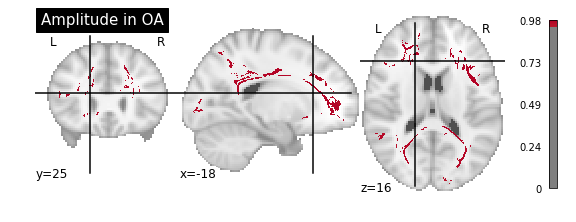

In [29]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_oa_skel_amp7_mfa_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Amplitude in OA')


In [31]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

cluster -i tbss_oa_skel_amp7_mfa_tfce_corrp_tstat1.nii.gz -t 0.95 --scalarname="1-p" --oindex=tbss_oa_skel_amp7_clusters --mm > cluster_t1_95_skel.txt

more cluster_t1_95_skel.txt

Cluster Index	Voxels	1-p-MAX	1-p-MAX X (mm)	1-p-MAX Y (mm)	1-p-MAX Z (mm)	1-p-COG X (mm)	1-p-COG Y (mm)	1-p-COG Z (mm)
24	12942	0.978	-19	50	-9	-29.4	-19	15.7
23	10127	0.978	14	42	-13	24.2	-8.93	19.4
22	862	0.95	45	-36	-19	33.3	-55.4	-4.92
21	743	0.95	49	-11	-32	48.9	-25.7	-15.7
20	245	0.95	14	3	51	11.2	5.17	58.5
19	218	0.95	-26	-85	-12	-33.3	-80.7	-4.84
18	198	0.95	32	-15	-11	30.2	-12	-3.63
17	102	0.95	-32	-14	-8	-31.7	-11.6	-2.47
16	94	0.95	38	-27	-3	35.7	-28.1	1.81
15	72	0.95	-11	-4	-2	-10.8	-2	1.39
14	67	0.95	-16	-52	54	-16	-52.7	59.1
13	46	0.95	-15	0	-6	-14.2	1.43	-3.43
12	45	0.95	48	-18	37	51.2	-16.5	40.6
11	43	0.95	-42	-78	7	-40.9	-78.3	10.3
10	29	0.95	37	-1	22	35.4	-0.517	23.6
9	28	0.95	37	-42	9	35.7	-39.9	10.1
8	28	0.95	45	-18	32	43.3	-19.5	35.2
7	25	0.95	48	-2	20	46.2	-2.12	22.2
6	25	0.95	-20	-38	51	-19.2	-37.2	52.6
5	13	0.95	-31	-43	56	-32.5	-43.5	58.2
4	11	0.95	-31	-20	-1	-31	-19.4	0.818
3	9	0.95	37	-35	5	36.7	-34.8	6.44
2	8	0.95	47	-16	28	48.1	-15.2	29.4
1	3	0.95	-32	-83	-

In [32]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

cluster -i tbss_ya_skel_amp7_mfa_tfce_corrp_tstat1.nii.gz -t 0.95 --scalarname="1-p" --oindex=tbss_ya_skel_amp7_clusters --mm > cluster_t1_95_skel.txt

more cluster_t1_95_skel.txt

Cluster Index	Voxels	1-p-MAX	1-p-MAX X (mm)	1-p-MAX Y (mm)	1-p-MAX Z (mm)	1-p-COG X (mm)	1-p-COG Y (mm)	1-p-COG Z (mm)
1	9194	0.986	14	42	-13	0.308	18.3	15.6


In [33]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

fslmaths tbss_ya_skel_amp7_clusters -uthr 1 -thr 1 -bin tbss_ya_skel_amp7_cluster1_mask

In [34]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_ya_skel_amp7_cluster1_mask

Unclassified:46.4655
Genu of corpus callosum:14.3966
Body of corpus callosum:18.0172
Splenium of corpus callosum:1.6379
Anterior limb of internal capsule L:1.1207
Anterior corona radiata R:6.0345
Anterior corona radiata L:5.8621
Superior corona radiata R:0.5172
Superior corona radiata L:1.2931
Posterior corona radiata R:0.4310
Posterior corona radiata L:0.1724
External capsule L:2.5000
Cingulum (cingulate gyrus) R:1.1207
Cingulum (cingulate gyrus) L:0.4310


In [42]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

fslmaths tbss_oa_skel_amp7_clusters -uthr 24 -thr 24 -bin tbss_oa_skel_amp7_cluster24_mask
fslmaths tbss_oa_skel_amp7_clusters -uthr 23 -thr 23 -bin tbss_oa_skel_amp7_cluster23_mask
fslmaths tbss_oa_skel_amp7_clusters -uthr 22 -thr 22 -bin tbss_oa_skel_amp7_cluster22_mask
fslmaths tbss_oa_skel_amp7_clusters -uthr 21 -thr 21 -bin tbss_oa_skel_amp7_cluster21_mask
fslmaths tbss_oa_skel_amp7_clusters -uthr 20 -thr 20 -bin tbss_oa_skel_amp7_cluster20_mask
fslmaths tbss_oa_skel_amp7_clusters -uthr 19 -thr 19 -bin tbss_oa_skel_amp7_cluster19_mask

In [37]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster24_mask

Unclassified:73.2054
Genu of corpus callosum:0.6807
Body of corpus callosum:3.2797
Splenium of corpus callosum:4.2698
Retrolenticular part of internal capsule L:1.5470
Anterior corona radiata L:6.3738
Superior corona radiata L:2.1040
Posterior corona radiata L:0.9901
Posterior thalamic radiation (include optic radiation) L:2.2896
Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) L:1.4851
External capsule L:1.0520
Fornix (cres) / Stria terminalis (can not be resolved with current resolution) L:0.3713
Superior longitudinal fasciculus L:2.3515


In [38]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster23_mask

Unclassified:58.9185
Genu of corpus callosum:3.8741
Body of corpus callosum:10.0081
Splenium of corpus callosum:6.8604
Anterior corona radiata R:9.6852
Superior corona radiata R:2.6634
Posterior corona radiata R:2.2599
Posterior thalamic radiation (include optic radiation) R:1.6142
External capsule R:0.5650
Superior longitudinal fasciculus R:3.5513


In [39]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster22_mask

Unclassified:88.0342
Posterior thalamic radiation (include optic radiation) R:9.4017
Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) R:2.5641


In [40]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster21_mask

Unclassified:90.3226
Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) R:8.6022
Superior longitudinal fasciculus R:1.0753


In [41]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster20_mask

Unclassified:100.0000


In [43]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster19_mask

Unclassified:100.0000


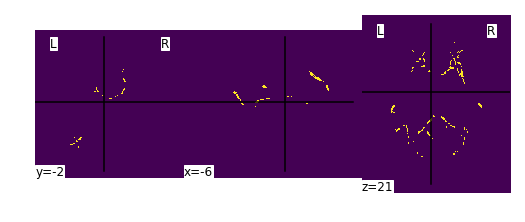

In [12]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'tbss_oa/stats/tbss_oa_skel_amp7_cluster5_mask.nii.gz')


In [34]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

#Text2Vest dsn_amp7.txt dsn_amp7.mat
Text2Vest dsn_RA.txt dsn_RA.mat
Text2Vest dsn_IS.txt dsn_IS.mat
Text2Vest dsn_IV.txt dsn_IV.mat

In [35]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

#Text2Vest dsn_amp7.txt dsn_amp7.mat
Text2Vest dsn_RA.txt dsn_RA.mat
Text2Vest dsn_IS.txt dsn_IS.mat
Text2Vest dsn_IV.txt dsn_IV.mat

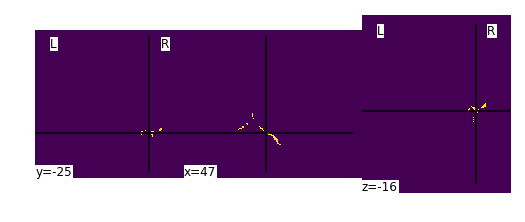

In [13]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'tbss_oa/stats/tbss_oa_skel_amp7_cluster4_mask.nii.gz')


In [16]:
%%bash

atlasquery --dumpatlases

Cerebellar Atlas in MNI152 space after normalization with FLIRT
Cerebellar Atlas in MNI152 space after normalization with FNIRT
Harvard-Oxford Cortical Structural Atlas
Harvard-Oxford Subcortical Structural Atlas
Human Sensorimotor Tracts Labels
JHU ICBM-DTI-81 White-Matter Labels
JHU White-Matter Tractography Atlas
Juelich Histological Atlas
MNI Structural Atlas
Mars Parietal connectivity-based parcellation
Mars TPJ connectivity-based parcellation
Neubert Ventral Frontal connectivity-based parcellation
Oxford Thalamic Connectivity Probability Atlas
Oxford-Imanova Striatal Connectivity Atlas 3 sub-regions
Oxford-Imanova Striatal Connectivity Atlas 7 sub-regions
Oxford-Imanova Striatal Structural Atlas
Sallet Dorsal Frontal connectivity-based parcellation
Subthalamic Nucleus Atlas
Talairach Daemon Labels


In [19]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster5_mask

Unclassified:69.1556
Genu of corpus callosum:2.5835
Body of corpus callosum:5.8601
Splenium of corpus callosum:5.0725
Retrolenticular part of internal capsule L:0.7561
Anterior corona radiata R:3.6232
Anterior corona radiata L:3.2766
Superior corona radiata R:1.0082
Superior corona radiata L:1.0712
Posterior corona radiata R:0.9452
Posterior corona radiata L:0.6301
Posterior thalamic radiation (include optic radiation) R:0.6931
Posterior thalamic radiation (include optic radiation) L:1.2287
Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) L:0.8192
External capsule L:0.5041
Fornix (cres) / Stria terminalis (can not be resolved with current resolution) L:0.1890
Superior longitudinal fasciculus R:1.4178
Superior longitudinal fasciculus L:1.1657


In [20]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster4_mask

Unclassified:86.9767
Posterior thalamic radiation (include optic radiation) R:5.5814
Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) R:5.5814
Superior longitudinal fasciculus R:1.8605


In [24]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster3_mask

Unclassified:100.0000


In [25]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster2_mask

Unclassified:100.0000


In [26]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_amp7_cluster1_mask

# Overlap

In [29]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
tbss_fill tbss_ya_skel_amp7_mfa_tfce_corrp_tstat1.nii.gz 0.95 mean_FA tbss_fill_ya_amp7

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
tbss_fill tbss_oa_skel_amp7_jhu_tfce_corrp_tstat1.nii.gz 0.95 mean_FA tbss_fill_oa_amp7



In [6]:
%%bash

fslmaths -h


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any

In [9]:
%%bash

#Extract map with regions of overlap for YA and OA

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
fslmaths tbss_ya_amp7_jhu_tfce_corrp_tstat1.nii.gz -thr 0.95 -bin tbss_ya_amp7_jhu_tfce_corrp_tstat1_bin.nii.gz

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
fslmaths tbss_oa_amp7_jhu_tfce_corrp_tstat1.nii.gz -thr 0.95 -bin tbss_oa_amp7_jhu_tfce_corrp_tstat1_bin.nii.gz

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats
fslmaths ../../tbss_oa/stats/tbss_oa_amp7_jhu_tfce_corrp_tstat1_bin.nii.gz -mul 2 -add ../../tbss_ya/stats/tbss_ya_amp7_jhu_tfce_corrp_tstat1_bin.nii.gz tbss_amp7_jhu_tfce_corrp_tstat1_bin_yaoa-sum.nii.gz

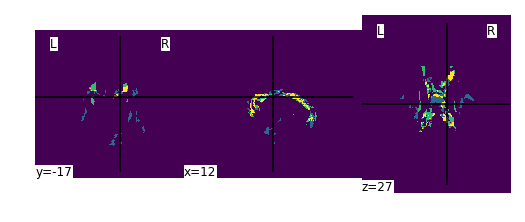

In [10]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'tbss/stats/tbss_amp7_jhu_tfce_corrp_tstat1_bin_yaoa-sum.nii.gz')


In [115]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
randomise -i all_FA_skeletonised -o tbss_ya_amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D


randomise options: -i all_FA_skeletonised -o tbss_ya_amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.27456e+52 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Starti

In [116]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
randomise -i all_MD_skeletonised -o tbss_oa_MD_1-amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_oa_MD_1-amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.68862e+74 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
S

In [118]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
randomise -i all_MD_skeletonised -o tbss_ya_MD_amp7-age-sex -d dsn_amp7-age-sex.mat \
-t 3var.con -n 500 --T2 -D

randomise options: -i all_MD_skeletonised -o tbss_ya_MD_amp7-age-sex -d dsn_amp7-age-sex.mat -t 3var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.27456e+52 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Sta

## MD

In [50]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

ls *.mat

dsn_ttest.mat
ya_oa_IV_int.mat
ya_oa_amp-ya_amp-oa.mat
ya_oa_amp_main_effect.mat


In [49]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_MD_skeletonised -o tbss_main_skel_MD -m mean_FA_skeleton_mask -d ya_oa_amp_main_effect.mat -t main_effect.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_main_skel_MD -m mean_FA_skeleton_mask -d ya_oa_amp_main_effect.mat -t main_effect.con -n 500 --T2 -D 
Loading Data: 
Data loaded
3.43851e+160 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutatio

/Users/megmcmahon/Library/Python/3.7/lib/python/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


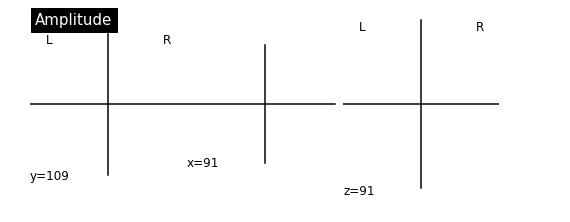

In [51]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_main_skel_MD_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Amplitude')


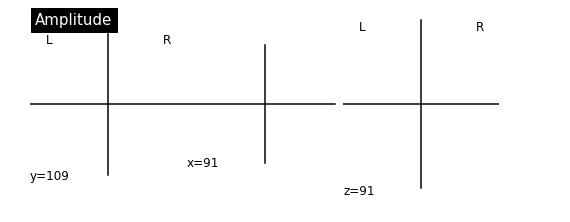

In [52]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_main_skel_MD_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Amplitude')


## Within age group TBSS MD analysis

In [53]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

randomise -i all_MD_skeletonised -o tbss_amp_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_amp7.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_amp_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_amp7.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
4.58552e+56 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permu

In [54]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

randomise -i all_MD_skeletonised -o tbss_amp_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_amp7.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_amp_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_amp7.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.01317e+76 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permu

No significant effect of amplitude on MD for either tstat1 or tstat2

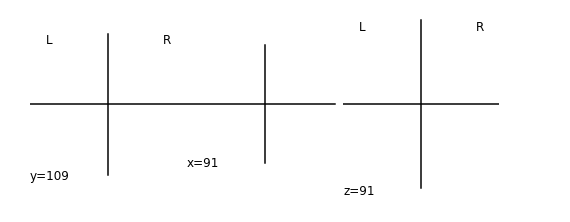

In [58]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_amp_skel_MD-YA_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm')


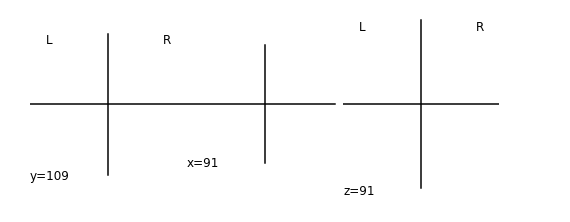

In [57]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_amp_skel_MD-OA_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm')


In [62]:
d['IV'].isnull().sum()

13

In [8]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

randomise -i all_MD_skeletonised -o tbss_RA_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_RA.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_RA_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_RA.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.97445e+48 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutat

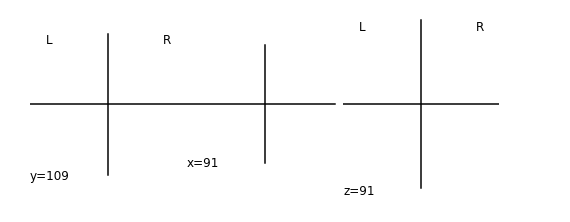

In [41]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_RA_skel_MD-YA_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm')


In [13]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

randomise -i all_MD_skeletonised -o tbss_RA_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_RA.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_RA_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_RA.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.04541e+62 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutat

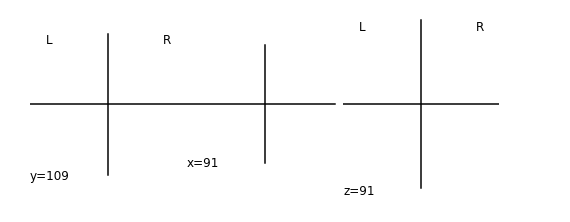

In [42]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_RA_skel_MD-OA_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm')


In [18]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

randomise -i all_MD_skeletonised -o tbss_IS_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_IS.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_IS_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_IS.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
5.7131e+45 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutati

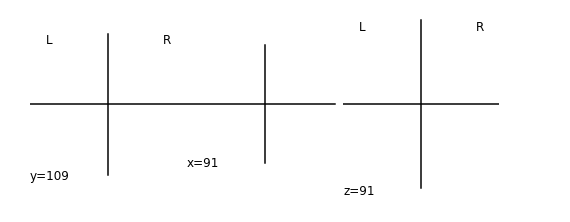

In [43]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_IS_skel_MD-YA_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm')


In [22]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

randomise -i all_MD_skeletonised -o tbss_IS_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_IS.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_IS_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_IS.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
9.42527e+65 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutat

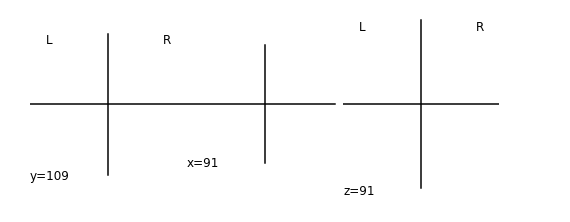

In [44]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_IS_skel_MD-OA_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm')


In [25]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

randomise -i all_MD_skeletonised -o tbss_IV_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_IV.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_IV_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_IV.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.89547e+51 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutat

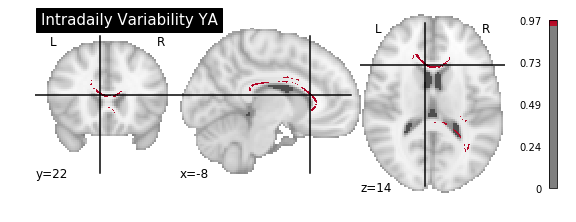

In [47]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_IV_skel_MD-YA_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Intradaily Variability YA')


In [63]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

cluster -i tbss_IV_skel_MD-YA_tfce_corrp_tstat2.nii.gz -t 0.95 --scalarname="1-p" --mm --oindex=tbss_ya_skel_IV_clusters > cluster_ya_IV_t2_95_skel.txt

more cluster_ya_IV_t2_95_skel.txt

Cluster Index	Voxels	1-p-MAX	1-p-MAX X (mm)	1-p-MAX Y (mm)	1-p-MAX Z (mm)	1-p-COG X (mm)	1-p-COG Y (mm)	1-p-COG Z (mm)
10	4250	0.97	-8	29	7	4.23	-3.44	17.1
9	860	0.956	25	-24	20	30.5	-15.2	24.2
8	198	0.952	32	-36	33	32.9	-27.1	40.2
7	194	0.952	19	32	25	17.8	32.7	29.9
6	108	0.952	-16	-46	21	-16.9	-45.2	21.2
5	26	0.95	20	-17	41	20.7	-16.7	43.3
4	15	0.95	-17	-52	26	-17.2	-51.1	27.3
3	13	0.95	19	-8	41	19.5	-8.46	43.8
2	4	0.95	-8	-12	26	-8.75	-11.8	26.8
1	1	0.95	-12	-12	29	-12	-12	29


In [71]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

fslmaths tbss_ya_skel_IV_clusters -uthr 10 -thr 10 -bin tbss_oa_skel_IV_cluster10_mask
fslmaths tbss_ya_skel_IV_clusters -uthr 9 -thr 9 -bin tbss_oa_skel_IV_cluster9_mask
fslmaths tbss_ya_skel_IV_clusters -uthr 8 -thr 8 -bin tbss_oa_skel_IV_cluster8_mask
fslmaths tbss_ya_skel_IV_clusters -uthr 7 -thr 7 -bin tbss_oa_skel_IV_cluster7_mask
fslmaths tbss_ya_skel_IV_clusters -uthr 6 -thr 6 -bin tbss_oa_skel_IV_cluster6_mask

In [72]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_IV_cluster10_mask

Unclassified:7.3529
Genu of corpus callosum:25.5515
Body of corpus callosum:34.3750
Splenium of corpus callosum:15.2574
Anterior corona radiata R:2.2059
Anterior corona radiata L:4.0441
Superior corona radiata R:1.6544
Superior corona radiata L:0.5515
Posterior corona radiata L:0.7353
Posterior thalamic radiation (include optic radiation) R:6.2500
Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) R:0.1838
Cingulum (cingulate gyrus) R:0.7353
Cingulum (cingulate gyrus) L:0.5515
Superior longitudinal fasciculus R:0.3676
Tapetum R:0.1838


In [73]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_IV_cluster9_mask

Unclassified:13.7255
Posterior limb of internal capsule R:3.9216
Retrolenticular part of internal capsule R:7.8431
Superior corona radiata R:42.1569
Posterior corona radiata R:7.8431
Superior longitudinal fasciculus R:24.5098


In [74]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_IV_cluster8_mask

Unclassified:62.5000
Superior longitudinal fasciculus R:37.5000


In [75]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_IV_cluster7_mask

Unclassified:100.0000


In [76]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

atlasquery -a "JHU ICBM-DTI-81 White-Matter Labels" -m tbss_oa_skel_IV_cluster6_mask

Unclassified:7.6923
Splenium of corpus callosum:92.3077


In [3]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats/*MD*

/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/all_MD.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/all_MD_skeletonised.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_IS_skel_MD-YA_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_IS_skel_MD-YA_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_IS_skel_MD-YA_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_IS_skel_MD-YA_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_IV_skel_MD-YA_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_IV_skel_MD-YA_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_IV_skel_MD-YA_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_IV_skel_MD-YA_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_RA_skel_MD-YA_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss_ya/stats/tbss_RA

In [4]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

tbss_fill tbss_IV_skel_MD-YA_tfce_corrp_tstat2.nii.gz 0.95 mean_FA tbss_fill_IV_MD_YA

/Users/megmcmahon/Library/Python/3.7/lib/python/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


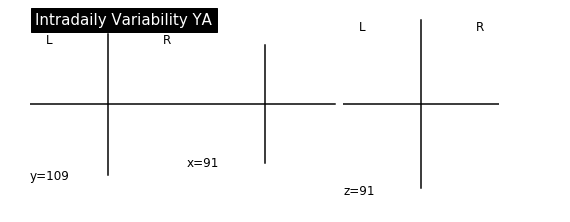

In [6]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_fill_IV_MD_YA.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Intradaily Variability YA')


In [28]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

randomise -i all_MD_skeletonised -o tbss_IV_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_IV.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_IV_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_IV.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
2.19873e+71 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutat

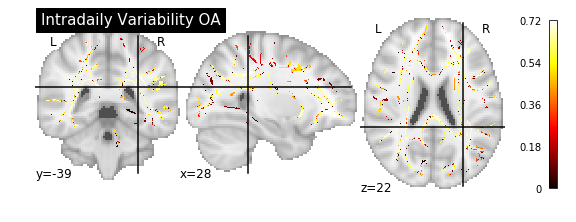

In [7]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_IV_skel_MD-OA_tfce_corrp_tstat1.nii.gz', title = 'Intradaily Variability OA')


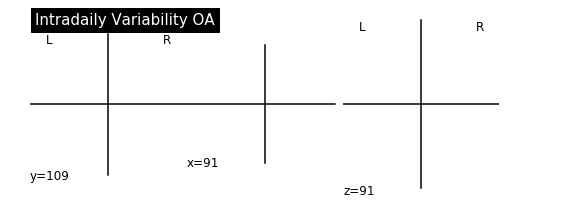

In [48]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_IV_skel_MD-OA_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'Intradaily Variability OA')


In [32]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

randomise -i all_MD_skeletonised -o tbss_fact_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_fact7.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_fact_skel_MD-YA -m mean_FA_skeleton_mask -d dsn_fact7.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.36474e+53 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting per

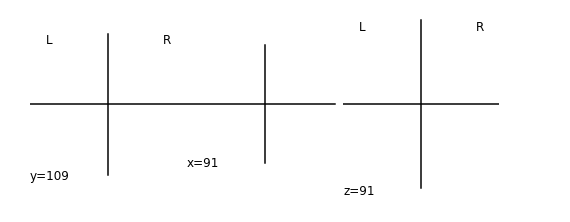

In [49]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_fact_skel_MD-YA_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm')


In [35]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

randomise -i all_MD_skeletonised -o tbss_fact_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_fact7.mat -t 1var.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_fact_skel_MD-OA -m mean_FA_skeleton_mask -d dsn_fact7.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
3.37724e+74 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting per

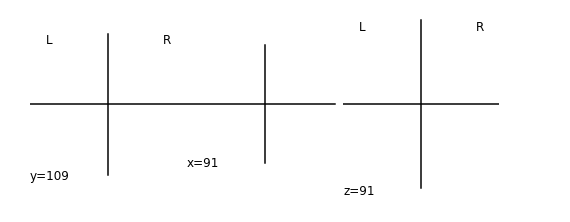

In [50]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_fact_skel_MD-OA_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm')


## Interaction IV

In [59]:
import numpy as np
import pandas as pd
import os

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
data_dir = '/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/'

x1 = np.concatenate((np.ones(46), np.zeros(57)))
x2 = np.concatenate((np.zeros(46), np.ones(57)))

d = pd.read_csv(data_dir + 'dataset_2020-04-09.csv', usecols = ['record_id', 'IV', 'sex', 'age'])
d = d.sort_values('record_id', ascending = True)
d = d.set_index('record_id')

ya_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_ya/origdata'), columns = ['files'])
oa_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_oa/origdata'), columns = ['files'])
files = pd.DataFrame(np.concatenate([ya_files, oa_files]), columns = ['files'])
files['record_id'] = files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
files = files.set_index('record_id')

dsn = []
dsn = files.join(d, sort=True).dropna(subset = ['files'])

dsn['IV'] = dsn['IV'].fillna(dsn['IV'].mean())
#NOT mean centering because testing the interaction
dsn

x3 = x1 * dsn['IV'].values
x4 = x2 * dsn['IV'].values

dsnmat = np.column_stack((x1, x2, x3, x4))
dsnmat

np.savetxt(scan_dir + 'tbss/new/ya_oa_IV_int.txt', dsnmat, fmt = '%f')


In [60]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

Text2Vest ya_oa_IV_int.txt ya_oa_IV_int.mat

In [61]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_MD_skeletonised -o tbss_IV_int_MD -m mean_FA_skeleton_mask -d ya_oa_IV_int.mat -t int.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_IV_int_MD -m mean_FA_skeleton_mask -d ya_oa_IV_int.mat -t int.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.8507e+152 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permuta

/Users/megmcmahon/Library/Python/3.7/lib/python/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


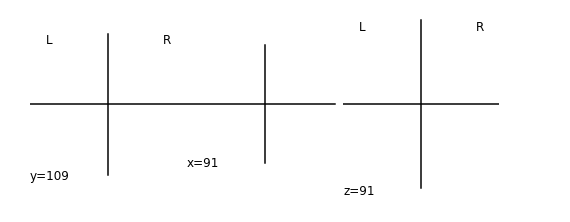

In [63]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_IV_int_MD_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm')


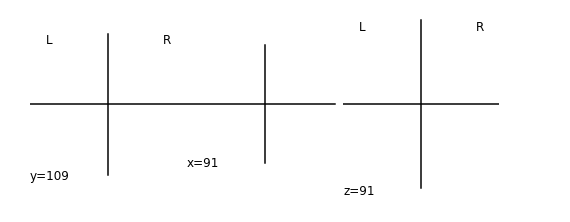

In [64]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_IV_int_MD_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm')


## Extract mean FA and MD values from CC

[How To Research Gate](https://www.researchgate.net/post/How_to_extract_FAMD_values_on_DTI_data_TBSS_analysis)

In [77]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/roi

FFpoint_L.nii.gz
FFpoint_R.nii.gz
FFsphere_L.nii.gz
FFsphere_R.nii.gz
LFpoint1_L.nii.gz
LFpoint1_R.nii.gz
LFpoint2_L.nii.gz
LFpoint2_R.nii.gz
LFsphere1_L.nii.gz
LFsphere1_R.nii.gz
LFsphere2_L.nii.gz
LFsphere2_R.nii.gz
PFpoint_L.nii.gz
PFpoint_R.nii.gz
PFsphere_L.nii.gz
PFsphere_R.nii.gz
cc.nii.gz
ccbody.nii.gz
cluster_L.nii.gz
cluster_R.nii.gz
cluster_sphere_L.nii.gz
cluster_sphere_R.nii.gz
coronaradiata.nii.gz
externalcapsule.nii.gz
genu.nii.gz
genu_point.nii.gz
genu_sphere.nii.gz
jhumask.nii.gz
postthalamicradiation.nii.gz
selected_rois.csv
splenium.nii.gz
splenium_point.nii.gz
splenium_sphere.nii.gz
stats
suplongfasciculus.nii.gz


In [79]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats

fslmeants -i all_MD_skeletonised.nii.gz -m ../../roi/cc.nii.gz -o meants_md_cc.txt
fslmeants -i all_MD_skeletonised.nii.gz -m ../../roi/coronaradiata.nii.gz -o meants_md_corrad.txt
fslmeants -i all_MD_skeletonised.nii.gz -m ../../roi/suplongfasciculus.nii.gz -o meants_md_suplonfas.txt

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

fslmeants -i all_MD_skeletonised.nii.gz -m ../../roi/cc.nii.gz -o meants_md_cc.txt
fslmeants -i all_MD_skeletonised.nii.gz -m ../../roi/coronaradiata.nii.gz -o meants_md_corrad.txt
fslmeants -i all_MD_skeletonised.nii.gz -m ../../roi/suplongfasciculus.nii.gz -o meants_md_suplonfas.txt

In [80]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
paste -d , meants_md*.txt >> ya_md_meants.txt

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
paste -d , meants_md*.txt >> oa_md_meants.txt

In [81]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
more oa_md_meants.txt

8.879459396e-05  ,0.0001110785688  ,0.0001128548764  
9.674857094e-05  ,0.0001305209758  ,0.0001250295165  
8.912910934e-05  ,0.0001082826103  ,0.0001127732802  
9.013855057e-05  ,0.000113955594  ,0.0001161541263  
8.942070871e-05  ,0.0001126792348  ,0.0001160466453  
8.901306286e-05  ,0.0001153446534  ,0.0001192620084  
8.288665535e-05  ,0.0001102233903  ,0.0001098810758  
8.934478828e-05  ,0.0001112772129  ,0.0001144764051  
9.87878109e-05  ,0.0001267154739  ,0.0001230817058  
8.90001613e-05  ,0.0001131541609  ,0.0001178401047  
8.416407503e-05  ,0.0001036550555  ,0.0001108890371  
9.200640493e-05  ,0.0001193231903  ,0.0001182610784  
9.001880603e-05  ,0.0001156448889  ,0.0001139269082  
9.272792238e-05  ,0.0001202061057  ,0.0001181173191  
8.966917741e-05  ,0.0001110107568  ,0.000113936893  
8.69057127e-05  ,0.0001103138171  ,0.0001120130773  
8.796030721e-05  ,0.0001089115016  ,0.0001145413025  
9.005777851e-05  ,0.0001173593584  ,0.0001167245902  
8.853520518e-05  ,0.0001113225167

In [85]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/origdata/
ls

sub-30004_dti_FA.nii.gz
sub-30008_dti_FA.nii.gz
sub-30009_dti_FA.nii.gz
sub-30012_dti_FA.nii.gz
sub-30015_dti_FA.nii.gz
sub-30019_dti_FA.nii.gz
sub-30020_dti_FA.nii.gz
sub-30023_dti_FA.nii.gz
sub-30040_dti_FA.nii.gz
sub-30057_dti_FA.nii.gz
sub-30064_dti_FA.nii.gz
sub-30066_dti_FA.nii.gz
sub-30069_dti_FA.nii.gz
sub-30074_dti_FA.nii.gz
sub-30085_dti_FA.nii.gz
sub-30088_dti_FA.nii.gz
sub-30090_dti_FA.nii.gz
sub-30091_dti_FA.nii.gz
sub-30095_dti_FA.nii.gz
sub-30096_dti_FA.nii.gz
sub-30116_dti_FA.nii.gz
sub-30118_dti_FA.nii.gz
sub-30119_dti_FA.nii.gz
sub-30128_dti_FA.nii.gz
sub-30181_dti_FA.nii.gz
sub-30217_dti_FA.nii.gz
sub-30236_dti_FA.nii.gz
sub-30242_dti_FA.nii.gz
sub-30255_dti_FA.nii.gz
sub-30274_dti_FA.nii.gz
sub-30295_dti_FA.nii.gz
sub-30346_dti_FA.nii.gz
sub-30376_dti_FA.nii.gz
sub-30395_dti_FA.nii.gz
sub-30400_dti_FA.nii.gz
sub-30403_dti_FA.nii.gz
sub-30412_dti_FA.nii.gz
sub-30426_dti_FA.nii.gz
sub-30432_dti_FA.nii.gz
sub-30466_dti_FA.nii.gz
sub-30469_dti_FA.nii.gz
sub-30478_dti_FA

## PVT main effect RT

In [83]:
oa_dsn['rt_mean'][0:5]

record_id
40160    255.898990
40170    371.103093
40175    415.752809
40288    283.628866
40351    229.408602
Name: rt_mean, dtype: float64

In [15]:
oa_dsn['rt_mean'].isnull().sum()

0

In [20]:
oa_dsn.shape

(57, 763)

In [50]:
ya_dsn['rt_mean'][0:5]

record_id
30004    315.387755
30008    295.263736
30009    321.202020
30012    290.311111
30015    265.574468
Name: rt_mean, dtype: float64

In [51]:
ya_dsn['rt_mean'].isnull().sum()

1

In [52]:
ya_dsn['rt_mean'] = ya_dsn['rt_mean'].fillna(ya_dsn['rt_mean'].mean())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
ya_dsn['rt_mean'].isnull().sum()

0

In [54]:
ya_dsn.shape

(46, 763)

In [72]:
dsn = []
dsn = pd.concat([ya_dsn, oa_dsn])

x1 = np.concatenate((np.ones(46), np.zeros(57)))
x2 = np.concatenate((np.zeros(46), np.ones(57)))

dsn_d = []
rt_mean = dsn['rt_mean'] - dsn['rt_mean'].mean()

x3 = x1 * rt_mean
x4 = x2 * rt_mean

dsn_d = np.column_stack((x1, x2, rt_mean.values))
dsn_d

array([[ 1.00000000e+00,  0.00000000e+00,  6.89015531e+00],
       [ 1.00000000e+00,  0.00000000e+00, -1.32338635e+01],
       [ 1.00000000e+00,  0.00000000e+00,  1.27044204e+01],
       [ 1.00000000e+00,  0.00000000e+00, -1.81864887e+01],
       [ 1.00000000e+00,  0.00000000e+00, -4.29231317e+01],
       [ 1.00000000e+00,  0.00000000e+00, -6.48661078e+00],
       [ 1.00000000e+00,  0.00000000e+00, -3.30430543e+01],
       [ 1.00000000e+00,  0.00000000e+00, -3.72741955e+01],
       [ 1.00000000e+00,  0.00000000e+00, -4.36710692e+01],
       [ 1.00000000e+00,  0.00000000e+00, -2.18382591e+01],
       [ 1.00000000e+00,  0.00000000e+00, -3.36975998e+01],
       [ 1.00000000e+00,  0.00000000e+00, -2.82475998e+01],
       [ 1.00000000e+00,  0.00000000e+00, -5.70430543e+01],
       [ 1.00000000e+00,  0.00000000e+00, -2.48019768e+01],
       [ 1.00000000e+00,  0.00000000e+00,  2.39217551e+01],
       [ 1.00000000e+00,  0.00000000e+00,  2.11621940e+01],
       [ 1.00000000e+00,  0.00000000e+00

In [73]:
dsn_d_int = np.column_stack((x1, x2, x3, x4))
dsn_d_int

array([[ 1.00000000e+00,  0.00000000e+00,  6.89015531e+00,
         0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -1.32338635e+01,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.27044204e+01,
         0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -1.81864887e+01,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -4.29231317e+01,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -6.48661078e+00,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -3.30430543e+01,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -3.72741955e+01,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -4.36710692e+01,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -2.18382591e+01,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -3.36975998e+01,
        -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -2.82475998e+01,
      

In [74]:
np.savetxt(scan_dir + 'tbss/new/pvt-rtmean.txt', dsn_d, fmt = '%f')
np.savetxt(scan_dir + 'tbss/new/pvt-rtmean_int.txt', dsn_d_int, fmt = '%f')

In [75]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

Text2Vest pvt-rtmean.txt pvt-rtmean.mat
Text2Vest pvt-rtmean_int.txt pvt-rtmean_int.mat

In [68]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_FA_skeletonised -o tbss_pvtrtmean_skel -m mean_FA_skeleton_mask -d pvt-rtmean.mat -t main_effect.con -n 500 --T2 -D


randomise options: -i all_FA_skeletonised -o tbss_pvtrtmean_skel -m mean_FA_skeleton_mask -d pvt-rtmean.mat -t main_effect.con -n 500 --T2 -D 
Loading Data: 
Data loaded
9.9029e+163 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Start

In [63]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

more main_effect.con

/NumWaves 3
/NumPoints 2
/Matrix
0 0 1
0 0 -1


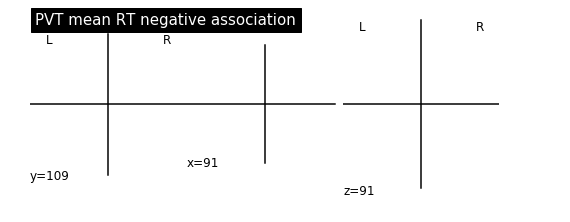

In [71]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_pvtrtmean_skel_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'PVT mean RT negative association')


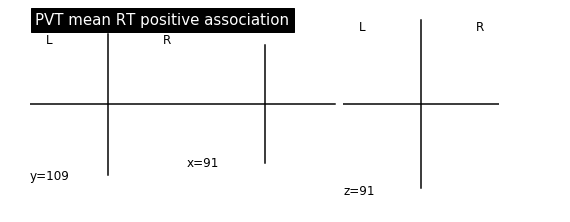

In [70]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_pvtrtmean_skel_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'PVT mean RT positive association')


No significant main effect of PVT mean RT.

## PVT age group interaction

In [79]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_FA_skeletonised -o tbss_pvtrtmean-int_skel -m mean_FA_skeleton_mask -d pvt-rtmean_int.mat -t int.con -n 500 --T2 -D


randomise options: -i all_FA_skeletonised -o tbss_pvtrtmean-int_skel -m mean_FA_skeleton_mask -d pvt-rtmean_int.mat -t int.con -n 500 --T2 -D 
Loading Data: 
Data loaded
9.9029e+163 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Start

/Users/megmcmahon/Library/Python/3.7/lib/python/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


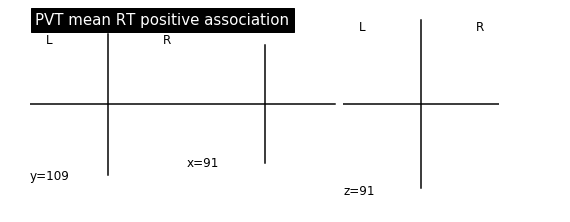

In [80]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_pvtrtmean-int_skel_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'PVT mean RT positive association')


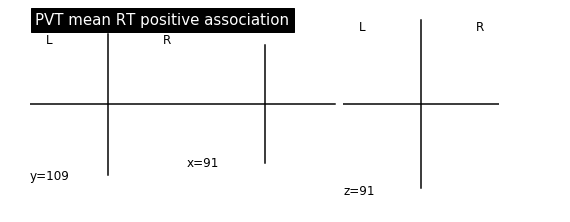

In [82]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_pvtrtmean-int_skel_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'PVT mean RT positive association')


In [85]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_MD_skeletonised -o tbss_pvtrtmean-int_md_skel -m mean_FA_skeleton_mask -d pvt-rtmean_int.mat -t int.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_pvtrtmean-int_md_skel -m mean_FA_skeleton_mask -d pvt-rtmean_int.mat -t int.con -n 500 --T2 -D 
Loading Data: 
Data loaded
9.9029e+163 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
St

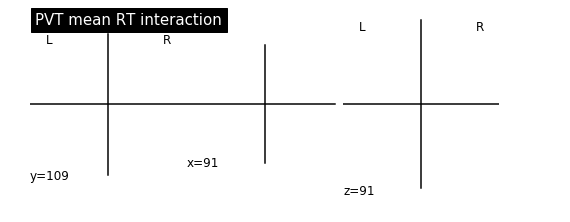

In [92]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_pvtrtmean-int_md_skel_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'PVT mean RT interaction')


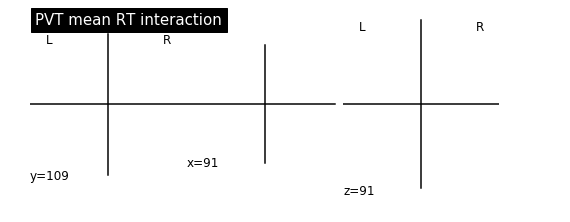

In [93]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_pvtrtmean-int_md_skel_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'PVT mean RT interaction')


In [88]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_MD_skeletonised -o tbss_pvtrtmean_md_skel -m mean_FA_skeleton_mask -d pvt-rtmean.mat -t main_effect.con -n 500 --T2 -D


randomise options: -i all_MD_skeletonised -o tbss_pvtrtmean_md_skel -m mean_FA_skeleton_mask -d pvt-rtmean.mat -t main_effect.con -n 500 --T2 -D 
Loading Data: 
Data loaded
9.9029e+163 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
St

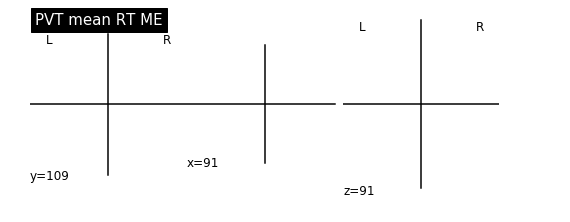

In [95]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_pvtrtmean_md_skel_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'PVT mean RT ME')


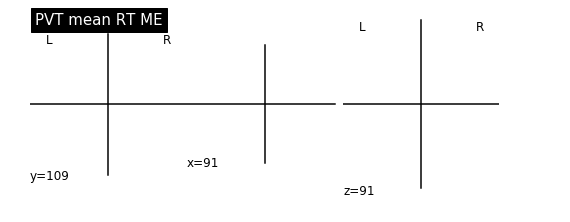

In [96]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_pvtrtmean-int_md_skel_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'PVT mean RT ME')
